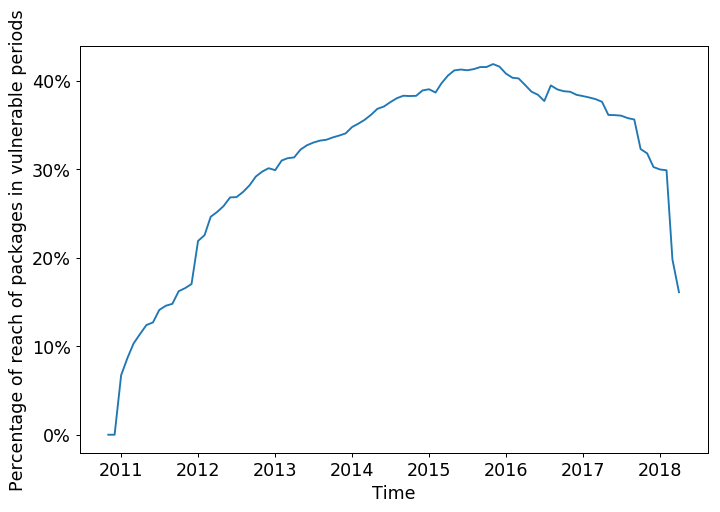

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def transformDf(df, key):
    df[key] = pd.to_datetime(df[key])
    df = df.set_index(key)
    return df

averageDeps = pd.read_json('averageDepsNew.json')
packageCounts = averageDeps["packageCount"]

# Reach
dataAvg = pd.read_json('vulnerableReachEvolution.json')
averagePackageReach = transformDf(dataAvg, "Key")

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(9,6), dpi=90)
plt.xlabel('Time')
plt.ylabel('Percentage of reach of packages in vulnerable periods')
plt.plot(averagePackageReach["Value"] / packageCounts)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.savefig("vulnerableReach.png")

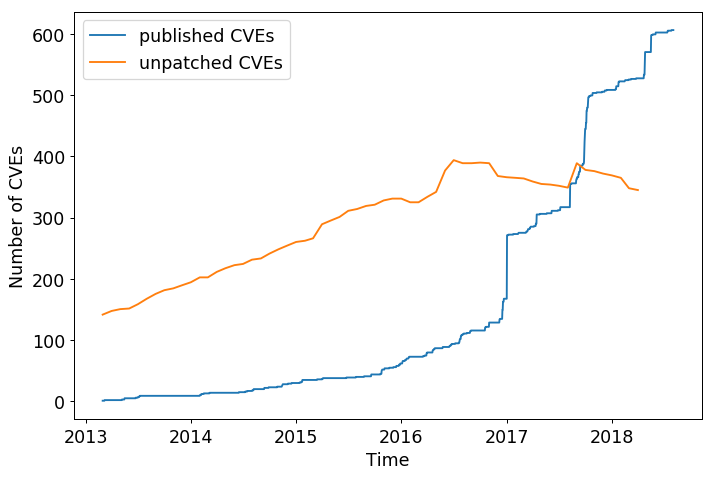

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def transformDf(df, key):
    df[key] = pd.to_datetime(df[key])
    df = df.set_index(key)
    return df


dataAvg = transformDf(pd.read_json('activeCveEvolution.json'), "Key")
publishedCVEs = pd.read_json('cves_graph.json')

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(9,6), dpi=90)
plt.xlabel('Time')
plt.ylabel('Number of CVEs')
plt.plot(publishedCVEs["publish"], label="published CVEs")
plt.plot(dataAvg["Value"]['2013-03-01':], label="unpatched CVEs")
plt.legend()

plt.savefig("published_unpatched_cves.png")

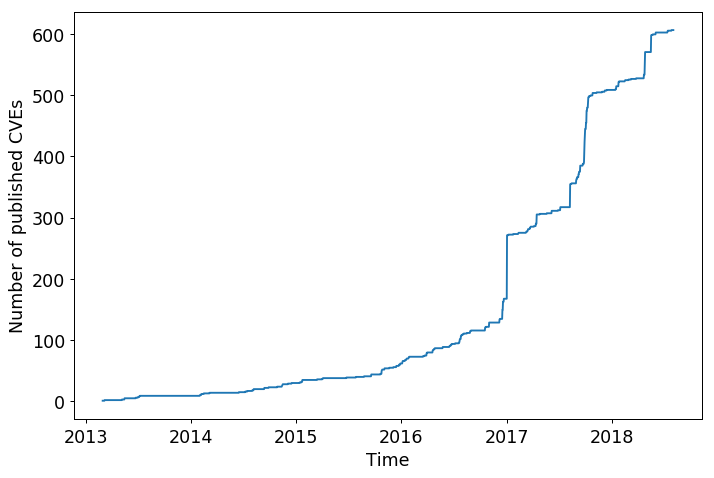

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dataAvg = pd.read_json('cves_graph.json')

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(9,6), dpi=90)
plt.xlabel('Time')
plt.ylabel('Number of published CVEs')
plt.plot(dataAvg["publish"])
plt.savefig("publishedCVE.png")